# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

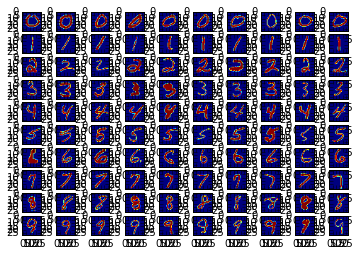

In [4]:
def P1(num_examples):

### STUDENT START ###

#variables to track number of images displayed and 
    count = 0
    iter = 1

#run through examples for each digit type until num_examples has been met
#for the specific digit, and then move on to the next digit type. 

    while(count < num_examples*10):
        if(Y[iter]==(math.floor(count/num_examples))):
            plt.subplot(10,num_examples,count+1)
            plt.imshow(np.reshape(X[iter,:],(28,28)))
            count+=1
        iter+=1
    plt.show()
### STUDENT END ###
num_examples=10
P1(num_examples)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

In [5]:
def P2(k_values):

### STUDENT START ###
    
    #the loop below trains a KNN classifier for each value of k provided
    #the training is done via the mini_train_data set which is small and
    #quick to compute.  Then, we predict on the dev_data set for 
    #cross-validation.  From the predicted values, we can determine the score
    #of the KNN classifier using the dev_labels
    for i in range(0,len(k_values)):
        KNN = KNeighborsClassifier(n_neighbors=k_values[i])
        KNN.fit(mini_train_data, mini_train_labels)
        dev_pred = KNN.predict(dev_data)
    
        if(k_values[i]==1):
            print(classification_report(dev_labels, dev_pred))
    
        print(KNN.score(dev_data,dev_labels))
    
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

0.878
0.869
0.865
0.863


ANSWER: 9 is the most difficult digit, assuming we rely upon f1-score as our metric for difficulty.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    import math
    KNN = KNeighborsClassifier(n_neighbors=1)
    
    #array to keep track of time ticks
    time_stamp = []

    #in this version, we hold the k constant at k=1 and train with various
    #amounts of training sizes to determine the accuracy and training time
    #change as data provided changes
    for i in range(0,len(train_sizes)):
    
        start = time.time()
        samples = train_sizes[i]
        KNN.fit(train_data[:samples],train_labels[:samples])
        accuracies.append(KNN.score(dev_data, dev_labels))
        end = time.time()
        time_stamp.append(end-start)
    
    print(accuracies)
    print(time_stamp)
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

[0.71999999999999997, 0.78600000000000003, 0.84099999999999997, 0.88400000000000001, 0.90200000000000002, 0.92600000000000005, 0.93700000000000006, 0.95899999999999996, 0.96999999999999997]
[0.12000012397766113, 0.2349998950958252, 0.5210001468658447, 1.0820000171661377, 2.110999822616577, 4.30400013923645, 8.819000005722046, 19.019999980926514, 40.84699988365173]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?



[3 pts]

[[ 1.24307226]]


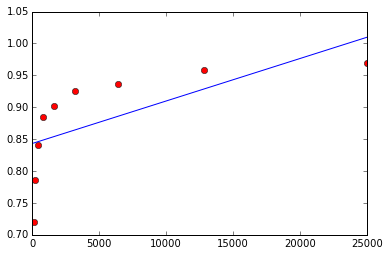

[2.0, 2.301029995663981, 2.602059991327962, 2.9030899869919433, 3.2041199826559246, 3.505149978319906, 3.8061799739838866, 4.107209969647868, 4.3979400086720375]
[[ 1.03386514]]


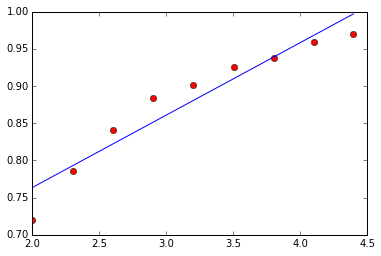

In [7]:
def P4():

### STUDENT START ###
    
    #given the list of accuracies, we try using linear regression with
    #sample as the independent variable, and accuracy as the dependent
    #variable.
    LR = LinearRegression()
    LR.fit(np.reshape(train_sizes,(len(train_sizes),1)),np.reshape(accuracies,(len(accuracies),1)))
    print(LR.predict(60000))
    plt.plot(train_sizes,accuracies,'ro')

    y_pred = []
    for i in range(0,len(train_sizes)):
        y_pred.append(LR.predict(train_sizes[i]))

    y_pred = np.reshape(y_pred,(len(y_pred),1))
    plt.plot(train_sizes,y_pred)
    plt.show()
    
    #linear regression on the data sucked because it is not linear.  So,
    #we transform it using log-scale transform, which turns out much better
    log_train_sizes = [log(y,10) for y in train_sizes]
    print(log_train_sizes)

    LR_log = LinearRegression()
    LR_log.fit(np.reshape(log_train_sizes,(len(log_train_sizes),1)),np.reshape(accuracies,(len(accuracies),1)))
    print(LR_log.predict(log(60000,10)))

    y_pred_log = []
    for i in range(0,len(log_train_sizes)):
        y_pred_log.append(LR_log.predict(log_train_sizes[i]))

    plt.plot(log_train_sizes,accuracies,'ro')

    y_pred_log = np.reshape(y_pred_log,(len(y_pred_log),1))
    plt.plot(log_train_sizes,y_pred_log)
    plt.show()
    
### STUDENT END ###
P4()

ANSWER: 

n=60000 -> 1.243 accuracy, which is not possible by definition

Applying a log transformation to the input data provides a more linear trend and gives us:

n=60000 -> 1.034 accuracy, which is still not possible, but is more reasonable

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

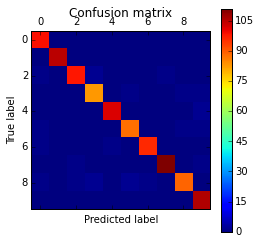

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]


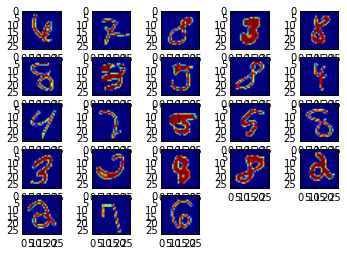

In [8]:
def P5():

### STUDENT START ###

    #we train KNN using k=1 and fit using all of the train_data, and then 
    #use the fitted model to predict the dev_data.  The confusion matrix
    #is then created using the dev labels and predicted labels and then
    #is displayed
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(train_data,train_labels)
    dev_pred = KNN.predict(dev_data)
    cm = confusion_matrix(dev_labels,dev_pred)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(cm)
    #Fit with all train data or should I use mini train or what? 
    #Only 4 pairs with 2 errors.

    count = 0
    iter = 1
    
    #display all pairs in error
    while((iter < len(dev_labels))):
        if((dev_pred[iter]!=dev_labels[iter])):
            plt.subplot(5,5,count+1)
            plt.imshow(np.reshape(dev_data[iter,:],(28,28)))
            count+=1
        iter+=1
    plt.show()
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

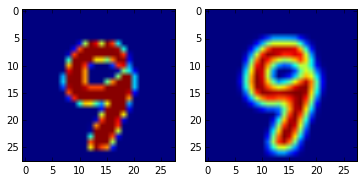

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        99
        1.0       0.11      1.00      0.20       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.25      0.16      0.20        91
        6.0       0.88      0.14      0.25        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.12      0.13      0.06      1000



C:\Users\Ricardo\Anaconda\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


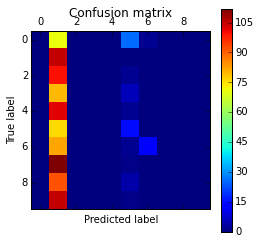

[[  0  71   0   0   0  26   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   2   0   0   0   0]
 [  0  80   0   0   0   6   0   0   0   0]
 [  0 102   0   0   0   2   0   0   0   0]
 [  0  76   0   0   0  15   0   0   0   0]
 [  0  82   0   0   0   2  14   0   0   0]
 [  0 112   0   0   0   1   0   0   0   0]
 [  0  92   0   0   0   4   0   0   0   0]
 [  0 105   0   0   0   1   0   0   0   0]]
             precision    recall  f1-score   support

        0.0       0.56      1.00      0.72        99
        1.0       0.99      0.91      0.95       105
        2.0       0.96      0.75      0.84       102
        3.0       0.84      0.57      0.68        86
        4.0       0.95      0.60      0.73       104
        5.0       0.94      0.56      0.70        91
        6.0       0.96      0.81      0.88        98
        7.0       0.96      0.70      0.81       113
        8.0       0.42      0.94      0.58        96
        9.0       0.76      0.67      

In [9]:
def P6(train_data, dev_data, train_labels, dev_labels):
    
### STUDENT START ###
    
    #this section is a bit large, but the first portion deals with using
    #Gaussian blur on just the train data, but not the dev_data
    
    #X_blur is the blurred version of X, and we simply go pixel by pixel
    #and take the average of the surrounding pixels, for pixels not in the 
    #border of the image because the border didn't matter given
    #the centered images.  Plus, it is would've been a hassle to handle the
    #edge cases.  Edge pixels without 8 neighbors were left as is
    X = train_data
    X_blur = np.zeros(shape=(len(X[:,1]),len(X[1,:])))
    sum_pixels = 0

    for i in range(0,len(X[:,1])):
        #reset img_blur temp storage
        img_blur = []
        for j in range(0,len(X[1,:])):
            #if on edge
            if((j-29 < 0) or (j+29 > len(X[i,:])) or ((j%28)-1 < 0) or (j%28 == 27)):
                img_blur.append(X[i,j])

            #if within
            else:
                sum_pixels = X[i,j-29] + X[i,j-28] + X[i,j-27] + X[i,j-1] + X[i,j] + X[i,j+1] + X[i,j+27] + X[i,j+28] + X[i,j+29]
                img_blur.append(np.mean(sum_pixels))

        X_blur[i,:] = img_blur

    #show just to verify the blur quality
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(X[1,:],(28,28)))
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(X_blur[1,:],(28,28)))
    plt.show()

    #train with blurred train but normal dev
    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(X_blur,train_labels)
    dev_pred = KNN.predict(dev_data)
    print(classification_report(dev_labels, dev_pred))

    cm = confusion_matrix(dev_labels,dev_pred)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(cm)
    
    #In this section, I blur the dev data, X_blur_dev, as was done above
    #but do not train with the blurred train_data. 
    X = dev_data
    X_blur_dev = np.zeros(shape=(len(X[:,1]),len(X[1,:])))
    sum_pixels = 0

    for i in range(0,len(X[:,1])):
        #reset img_blur temp storage
        img_blur = []
        for j in range(0,len(X[1,:])):
            #if on edge
            if((j-29 < 0) or (j+29 > len(X[i,:])) or ((j%28)-1 < 0) or (j%28 == 27)):
                img_blur.append(X[i,j])

            #if within
            else:
                sum_pixels = X[i,j-29] + X[i,j-28] + X[i,j-27] + X[i,j-1] + X[i,j] + X[i,j+1] + X[i,j+27] + X[i,j+28] + X[i,j+29]
                img_blur.append(np.mean(sum_pixels))

        X_blur_dev[i,:] = img_blur

    KNN.fit(train_data,train_labels)
    dev_pred = KNN.predict(X_blur_dev)
    print(classification_report(dev_labels, dev_pred))

    #Here, we use both the blurred train_data and blurred dev_data. It
    #works much better.
    KNN.fit(X_blur,train_labels)
    dev_pred = KNN.predict(X_blur_dev)
    print(classification_report(dev_labels, dev_pred))
    

### STUDENT END ###

P6(train_data, dev_data, train_labels, dev_labels)

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [68]:
def P7():

### STUDENT START ###
    #binarize the train_data so that Bernoulli Naive-Bayes can consume it
    #for the training process.  Cross-validate with the dev_data with the
    #trained BNB and see how it performs
    
    BNB = BernoulliNB()
    binary_train_data = binarize(train_data,threshold=0.5)
    binary_dev_data = binarize(dev_data,threshold=0.5)
    
    BNB.fit(binary_train_data, train_labels)
    dev_pred = BNB.predict(binary_dev_data)
    print(classification_report(dev_labels, dev_pred))

    #create multinomial data by discretizing the image into 0, 1, or 2.
    #repeat the process above for the Multinomial Naive Bayes and compare
    trinary_train_data = np.zeros(shape=(len(train_data[:,1]),len(train_data[1,:])))
    trinary_dev_data = np.zeros(shape=(len(dev_data[:,1]),len(dev_data[1,:])))
    
    #change train data to trinary
    for i in range(0,len(train_data[:,1])):
        temp_vec = []
        for j in range(0,len(train_data[1,:])):
            if(train_data[i,j] < (1/3)):
                temp_vec.append(0)
            elif(train_data[i,j] > (2/3)):
                temp_vec.append(2)
            else:
                temp_vec.append(1)

        trinary_train_data[i,:] = temp_vec
    
    #change dev data to trinary
    for i in range(0,len(dev_data[:,1])):
        temp_vec = []
        for j in range(0,len(dev_data[1,:])):
            if(dev_data[i,j] < (1/3)):
                temp_vec.append(0)
            elif(dev_data[i,j] > (2/3)):
                temp_vec.append(2)
            else:
                temp_vec.append(1)

        trinary_dev_data[i,:] = temp_vec

    MNB = MultinomialNB()
    MNB.fit(trinary_train_data, train_labels)
    dev_pred = MNB.predict(trinary_dev_data)
    print(classification_report(dev_labels, dev_pred))
    
### STUDENT END ###

P7()

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96        99
        1.0       0.86      0.95      0.90       105
        2.0       0.88      0.79      0.84       102
        3.0       0.70      0.76      0.73        86
        4.0       0.86      0.83      0.84       104
        5.0       0.88      0.77      0.82        91
        6.0       0.91      0.88      0.89        98
        7.0       0.93      0.82      0.87       113
        8.0       0.75      0.82      0.79        96
        9.0       0.76      0.83      0.79       106

avg / total       0.85      0.84      0.85      1000

             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        99
        1.0       0.77      0.96      0.86       105
        2.0       0.87      0.75      0.81       102
        3.0       0.66      0.76      0.71        86
        4.0       0.86      0.80      0.83       104
        5.0       0.89      0.60      0.72

ANSWER: MNB does not improve results, which we conclude by comparing the Precision, Recall, and F-Scores, but it isn't obvious as to why it doesn't improve things.  If I had to guess, which I do, it would be because writing is better represented by a black and white binary space.  If we were to do image recognition for faces, for example, MNB would likely do much better because shading communicates depth and other important information that simple binary representation could not.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [17]:
def P8(alphas):

### STUDENT START ###
    binary_train_data = binarize(train_data,threshold=0.5)

    optimal_BNB = BernoulliNB()
    grid_search_BNB = GridSearchCV(optimal_BNB,alphas)
    grid_search_BNB.fit(binary_train_data,train_labels)

    print 'For Bernoulli NB'
    print(grid_search_BNB.best_params_)
    print(grid_search_BNB.grid_scores_)

    #create multinomial data by discretizing the image into 0, 1, or 2.
    #repeat the process above for the Multinomial Naive Bayes and compare
    trinary_train_data = np.zeros(shape=(len(train_data[:,1]),len(train_data[1,:])))

    for i in range(0,len(train_data[:,1])):
        temp_vec = []
        for j in range(0,len(train_data[1,:])):
            if(train_data[i,j] < (1/3)):
                temp_vec.append(0)
            elif(train_data[i,j] > (2/3)):
                temp_vec.append(2)
            else:
                temp_vec.append(1)
                
    optimal_MNB = MultinomialNB()
    grid_search_MNB = GridSearchCV(optimal_MNB,alphas)
    grid_search_MNB.fit(trinary_train_data,train_labels)

    print 'For Multinomial NB'
    print(grid_search_MNB.best_params_)
    print(grid_search_MNB.grid_scores_)

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

For Bernoulli NB
{'alpha': 0.0001}
[mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]
For Multinomial NB
{'alpha': 0.0001}
[mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.11215, std: 0.00001, params: {'alpha': 0.0001}, mean: 0.11215, std: 0.00001, params: {'alpha': 0.001}, mean: 0.11215, std: 0.00001, params: {'alpha': 0.01}, mean: 0.11215, std: 0.00001, params: {'alpha': 0.1}, mean: 0.11215, std: 0.00001, params: {'alpha': 0.5}, mean: 0.11215, std: 0.00001, params: {'alpha': 1.0}, mean: 0.11215, std: 0.00001, params: {'alpha': 2.0}, mean: 0.1121

NameError: name 'nb' is not defined

ANSWER: I expected alpha = 0 to yield the same score as BNB when alpha isn't specified, which is not the case.  The divide by zero issue makes me believe I made a mistake somewhere, but I cannot say where.  

Alpha = 0.0001 is the best one

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

             precision    recall  f1-score   support

        0.0       0.73      0.97      0.83        99
        1.0       0.82      0.94      0.88       105
        2.0       0.90      0.25      0.40       102
        3.0       0.75      0.44      0.55        86
        4.0       0.86      0.23      0.36       104
        5.0       0.50      0.03      0.06        91
        6.0       0.67      0.94      0.78        98
        7.0       0.80      0.28      0.42       113
        8.0       0.33      0.70      0.45        96
        9.0       0.39      0.94      0.56       106

avg / total       0.68      0.58      0.53      1000

theta: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]], sigma: [[  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-0

C:\Users\Ricardo\Anaconda\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


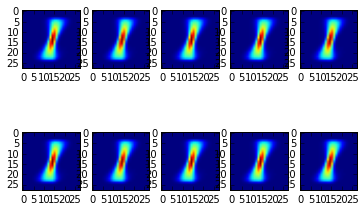

0.744
0.771
0.791
0.805
0.826
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.96        99
        1.0       0.86      0.90      0.88       105
        2.0       0.82      0.75      0.79       102
        3.0       0.74      0.71      0.73        86
        4.0       0.86      0.73      0.79       104
        5.0       0.77      0.73      0.75        91
        6.0       0.84      0.87      0.85        98
        7.0       0.94      0.73      0.83       113
        8.0       0.70      0.79      0.74        96
        9.0       0.65      0.86      0.74       106

avg / total       0.82      0.81      0.81      1000



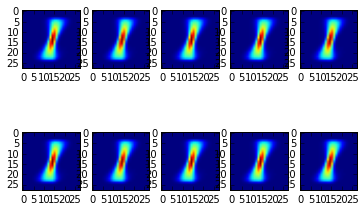

0
0.1


In [14]:
def P9():

    
#In this section, we train a Gaussian Naive Bayes classifier, and we find that the classifier is not 
#performant with the data as it is, and it requires noise to be added in order to satisfy the 
#underlying model assumptions.

### STUDENT END ###
    GNB = GaussianNB()
    GNB.fit(train_data, train_labels)
    dev_pred = GNB.predict(dev_data)
    print(classification_report(dev_labels, dev_pred))
    print "theta: {}, sigma: {}".format(GNB.theta_,GNB.sigma_)

    for i in range(0,GNB.theta_.shape[0]):
            plt.subplot(2,5,i)
            plt.imshow(np.reshape(GNB.theta_[1,:],(28,28)))
    plt.show()

    #add gaussian noise, find best noise amount

    mean = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
    std = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
    best_score = 0
    best_mean = 0
    best_std = 0

    #for each mean and std dev, run gaussian having added gaussian noise and find the best
    for mean_val in range(0, len(mean)):
        for std_val in range(0, len(std)):

            noise_train_data = [y+np.random.normal(mean[mean_val],std[std_val]) for y in train_data]
            noise_dev_data = [y+np.random.normal(mean[mean_val],std[std_val]) for y in dev_data]
            GNB = GaussianNB()
            GNB.fit(noise_train_data, train_labels)
            score = GNB.score(noise_dev_data,dev_labels)

            if score > best_score:
                print score
                best_score = score
                best_mean = mean[mean_val]
                best_std = std[std_val]

    noise_train_data = [y+np.random.normal(best_mean,best_std) for y in train_data]
    noise_dev_data = [y+np.random.normal(best_mean,best_std) for y in dev_data]
    GNB = GaussianNB()
    GNB.fit(noise_train_data, train_labels)  
    dev_pred = GNB.predict(noise_dev_data)

    print(classification_report(dev_labels, dev_pred))

    for i in range(0,GNB.theta_.shape[0]):
            plt.subplot(2,5,i)
            plt.imshow(np.reshape(GNB.theta_[1,:],(28,28)))
    plt.show()

    print best_mean
    print best_std

### STUDENT END ###

gnb = P9()

ANSWER: GNB failed because the data was not even remotely Gaussian as standard deviation was 0 for many pixels.  Adding a bit of Gaussian noise fixed the issue, and I was able to train it perform on par with BNB after searching for the right amount of noise after trying various values.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

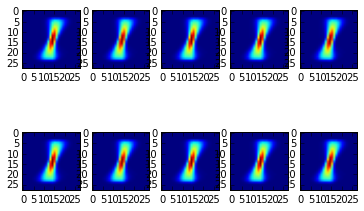

0.984697667509


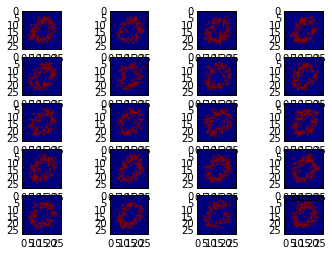

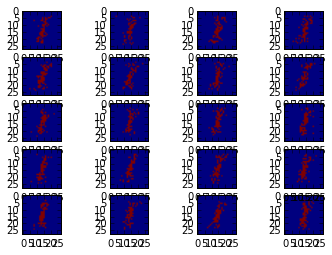

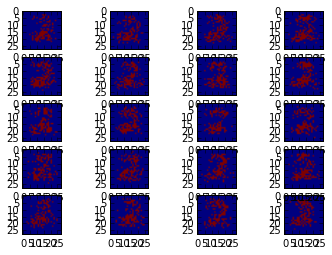

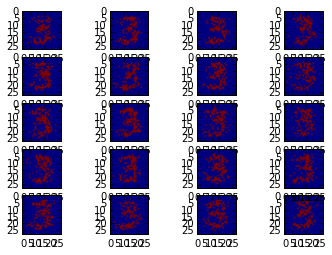

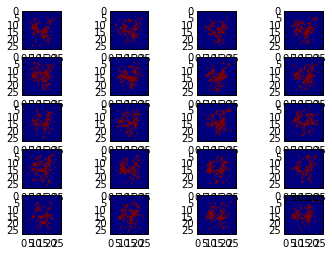

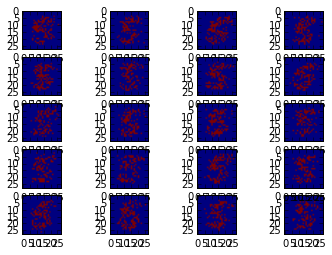

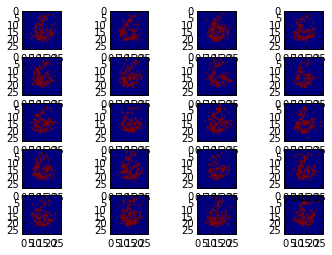

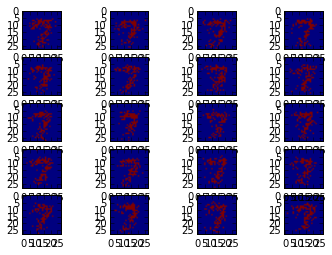

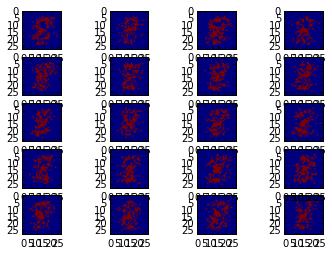

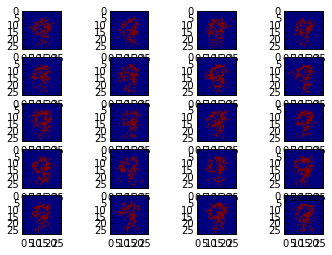

In [22]:
def P10(num_examples, train_data, train_labels):

### STUDENT START ###

    #we generate examples using thresholding of the probabilities by saying
    #selecting a random number from 0 to 1 uniform dist, and if the number is
    #below the probability of that pixel being "on", we set it to 1,
    #otherwise, we set it 
    BNB = BernoulliNB()
    binary_train_data = binarize(train_data,threshold=0.5)

    BNB.fit(binary_train_data, train_labels)

    #get the probabilities

    feat_prob = np.array([np.exp(y) for y in BNB.feature_log_prob_])

    for i in range(0,feat_prob.shape[0]):
            plt.subplot(2,5,i)
            plt.imshow(np.reshape(feat_prob[1,:],(28,28)))
    plt.show()

    print np.amax(feat_prob)

    #generate examples


    for cur_num in range(0,10):
        gen_examples = np.zeros(shape=(20,len(train_data[1,:])))
        for num_ex in range(0, 20):
            temp = []
            for pixel_gen in range(0,len(train_data[1,:])):
                rand_val = np.random.rand()
                if rand_val <= feat_prob[cur_num,pixel_gen]: 
                    temp.append(1)
                else:
                    temp.append(0)

            gen_examples[num_ex,:] = temp

        for i in range(0,gen_examples.shape[0]):
                plt.subplot(5,4,i)
                plt.imshow(np.reshape(gen_examples[i,:],(28,28)))
        plt.show()

### STUDENT END ###

P10(20, train_data, train_labels)

ANSWER: The generated versions are much fuzzier than the examples. Some are hard to see, but the general shape is usually there.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [69]:
def P11(buckets, correct, total, train_data, train_labels, dev_data, dev_labels):
    
#In this section, we take the train data and binarize it in preparation for the Bernoulli Naive Bayes
#classifier, and we see if the optimal alpha from above provides a strongly, weakly, or poorly calibrated
#classifier.
### STUDENT START ###
    binary_train_data = binarize(train_data,threshold=0.5)
    binary_dev_data = binarize(dev_data,threshold=0.5)
    BNB = BernoulliNB(alpha=0.0001)
    BNB.fit(binary_train_data, train_labels)

    for sample in range(0,len(dev_labels)):
        for i in range(0,len(buckets)):
            pred_class = BNB.predict(binary_dev_data[sample,:])
            pred_prob = np.amax(BNB.predict_proba(binary_dev_data[sample,:]))

            if( (dev_labels[sample] == int(pred_class)) and (pred_prob >= buckets[i]) ):
                correct[i]+=1

            if( pred_prob >= buckets[i]):
                total[i]+=1

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total, train_data, train_labels, dev_data, dev_labels)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / float(total[i])
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total = 997    accuracy = 0.852
p(pred) <= 0.9000000000000    total = 957    accuracy = 0.863
p(pred) <= 0.9990000000000    total = 860    accuracy = 0.905
p(pred) <= 0.9999900000000    total = 785    accuracy = 0.930
p(pred) <= 0.9999999000000    total = 722    accuracy = 0.949
p(pred) <= 0.9999999990000    total = 652    accuracy = 0.957
p(pred) <= 0.9999999999900    total = 577    accuracy = 0.965
p(pred) <= 0.9999999999999    total = 496    accuracy = 0.972
p(pred) <= 1.0000000000000    total = 469    accuracy = 0.977


ANSWER: The classifier is calibrated, as it is monotonically increasing according to the samples we took.  It is weakly calibrated as the predicted probability is not representative of the actual accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

GNB with noise and no extra features
0.752
BNB with noise and no extra features
0.83
14.0
14.0


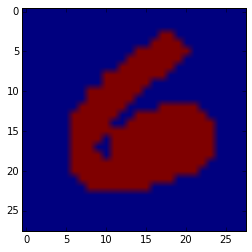

14.0
15.0


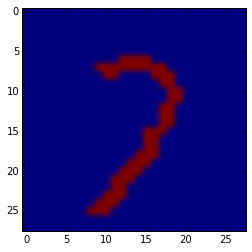

BNB with centroid feature
0.829
BNB with centroid and rowcol sum
0.835
[[ 0.  0.  0.  0.  0.  1.  1.  2.  2.  2.  1.  1.  1.  1.  2.  1.  1.  1.
   1.  1.  1.  2.  2.  1.  1.  0.  0.  0.]]


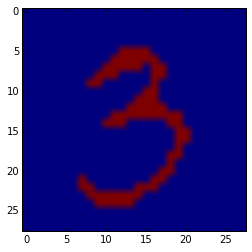

[[ 0.  0.  0.  0.  0.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  1.  1.  0.  0.  0.  0.  0.]]


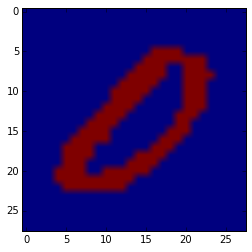

BNB with centroid, rowcol sum, and row intersect
0.862


In [24]:
def P12(mini_train_data, mini_train_labels, dev_data, dev_labels):

    import math
### STUDENT START ###
    
    mean = 0
    std = 0.1
    noise_train_data = [y+np.random.normal(mean,std) for y in mini_train_data]
    noise_dev_data = [y+np.random.normal(mean,std) for y in dev_data]
    GNB = GaussianNB()
    GNB.fit(noise_train_data, mini_train_labels)
    score = GNB.score(noise_dev_data,dev_labels)
    print "GNB with noise and no extra features"
    print score
                
    mini_binary_train_data = binarize(mini_train_data,threshold=0.5)
    binary_dev_data = binarize(dev_data,threshold=0.5)
    
    BNB = BernoulliNB(alpha=0.0001)
    BNB.fit(mini_binary_train_data, mini_train_labels)
    score = BNB.score(binary_dev_data,dev_labels)
    print "BNB with noise and no extra features"
    print score
    
    ############### ADD CENTER OF MASS FEATURE ##############
    
    mini_binary_train_data_centroid = np.zeros(shape=(len(mini_binary_train_data[:,1]),len(mini_binary_train_data[1,:]) + 56))
    binary_dev_data_centroid = np.zeros(shape=(len(binary_dev_data[:,1]),len(binary_dev_data[1,:]) + 56))
    mini_binary_train_data_centroid[:,0:(mini_binary_train_data.shape[1])] = mini_binary_train_data
    binary_dev_data_centroid[:,0:(binary_dev_data.shape[1])] = binary_dev_data
    
    #compute centroid for train data
    for sample in range(0,len(mini_train_labels)):
        col_sum = 0
        row_sum = 0
        total_pixels = 0
        for pixel in range(0,mini_binary_train_data.shape[1]):
            if mini_binary_train_data[sample,pixel] == 1:
                col_sum+= (pixel%28)
                row_sum+= math.floor(pixel/28)
                total_pixels+= 1
        
        centroid_col = round(float(col_sum / total_pixels))
        centroid_row = round(float(row_sum / total_pixels))
        
        #turn on col centroid position
        mini_binary_train_data_centroid[sample, (mini_binary_train_data.shape[1] - 1) + int(centroid_col)] = 1
        mini_binary_train_data_centroid[sample, (mini_binary_train_data.shape[1] - 1) + int(centroid_row) + 28] = 1
        
        
        #debug step
        if sample == 33:
            print centroid_col
            print centroid_row
            
            #show just to verify the blur quality
            plt.imshow(np.reshape(mini_binary_train_data[sample,:],(28,28)))
            plt.show()
            
    #compute centroid for dev data
    for sample in range(0,len(dev_labels)):
        col_sum = 0
        row_sum = 0
        total_pixels = 0
        for pixel in range(0,binary_dev_data.shape[1]):
            if binary_dev_data[sample,pixel] == 1:
                col_sum+= (pixel%28)
                row_sum+= math.floor(pixel/28)
                total_pixels+= 1
        
        centroid_col = round(float(col_sum / total_pixels))
        centroid_row = round(float(row_sum / total_pixels))
        
        #turn on col centroid position
        binary_dev_data_centroid[sample, (binary_dev_data.shape[1] - 1) + int(centroid_col)] = 1
        binary_dev_data_centroid[sample, (binary_dev_data.shape[1] - 1) + int(centroid_row) + 28] = 1
    
        #debug step
        if sample == 33:
            print centroid_col
            print centroid_row
            
            #show just to verify the blur quality
            plt.imshow(np.reshape(binary_dev_data[sample,:],(28,28)))
            plt.show()
            
    BNB = BernoulliNB(alpha=0.0001)
    BNB.fit(mini_binary_train_data_centroid, mini_train_labels)
    score = BNB.score(binary_dev_data_centroid,dev_labels)
    print "BNB with centroid feature"
    print score
    
    ############### ADD SUM PIXELS PER ROW & COL ##############
    
    mini_binary_train_data_centroid_rcsum = np.zeros(shape=(len(mini_binary_train_data_centroid[:,1]),len(mini_binary_train_data_centroid[1,:]) + 56))
    binary_dev_data_centroid_rcsum = np.zeros(shape=(len(binary_dev_data_centroid[:,1]),len(binary_dev_data_centroid[1,:]) + 56))
    mini_binary_train_data_centroid_rcsum[:,0:(mini_binary_train_data_centroid.shape[1])] = mini_binary_train_data_centroid
    binary_dev_data_centroid_rcsum[:,0:(binary_dev_data_centroid.shape[1])] = binary_dev_data_centroid
    
    #threshold for binarizing col and row features
    #3 yielded the best improvement
    threshold = 3
    
    #compute sum pixels for each column and row train data
    for sample in range(0,len(mini_train_labels)):
        
        #initialize
        col_sum_array = np.zeros(shape=(28,1))
        row_sum_array = np.zeros(shape=(28,1))
        
        for pixel in range(0,mini_binary_train_data.shape[1]):
            if mini_binary_train_data[sample,pixel] == 1:
                col_sum_array[(pixel%28)]+=1 
                row_sum_array[int(math.floor(pixel/28))]+=1 
        
        #binarize by setting to 1 if more than X pixels are on in row or col
        
        
        #debug step
        #if sample == 1:
            #print np.reshape(col_sum_array,(1,28))
            #print np.reshape(row_sum_array,(1,28))

            #show just to verify the blur quality
            #plt.imshow(np.reshape(mini_binary_train_data[sample,:],(28,28)))
            #plt.show()
                
        
        for dim in range (0,len(col_sum_array)):
            if col_sum_array[dim] > threshold:
                mini_binary_train_data_centroid_rcsum[sample, (mini_binary_train_data_centroid.shape[1] - 1) + dim] = 1
            if row_sum_array[dim] > threshold:
                mini_binary_train_data_centroid_rcsum[sample, (mini_binary_train_data_centroid.shape[1] - 1) + dim + 28] = 1
        
    
    #compute sum pixels for each column and row dev data
    for sample in range(0,len(dev_labels)):
        
        #initialize
        col_sum_array = np.zeros(shape=(28,1))
        row_sum_array = np.zeros(shape=(28,1))
        
        for pixel in range(0,binary_dev_data.shape[1]):
            if binary_dev_data[sample,pixel] == 1:
                col_sum_array[(pixel%28)]+=1 
                row_sum_array[int(math.floor(pixel/28))]+=1 
        
        #debug step
        #if sample == 1:
            #print np.reshape(col_sum_array,(1,28))
            #print np.reshape(row_sum_array,(1,28))

            #show just to verify the blur quality
            #plt.imshow(np.reshape(mini_binary_train_data[sample,:],(28,28)))
            #plt.show()
                
        #binarize by setting to 1 if more than X pixels are on in row or col
        
        for dim in range (0,len(col_sum_array)):
            if col_sum_array[dim] > threshold:
                binary_dev_data_centroid_rcsum[sample, (binary_dev_data_centroid.shape[1] - 1) + dim] = 1
            if row_sum_array[dim] > threshold:
                binary_dev_data_centroid_rcsum[sample, (binary_dev_data_centroid.shape[1] - 1) + dim + 28] = 1
            
    BNB = BernoulliNB(alpha=0.0001)
    BNB.fit(mini_binary_train_data_centroid_rcsum, mini_train_labels)
    score = BNB.score(binary_dev_data_centroid_rcsum,dev_labels)
    print "BNB with centroid and rowcol sum"
    print score

    ############### INTERSECTS PER ROW ##############
    
    mini_binary_train_data_centroid_rcsum_x = np.zeros(shape=(len(mini_binary_train_data_centroid_rcsum[:,1]),len(mini_binary_train_data_centroid_rcsum[1,:]) + 28))
    binary_dev_data_centroid_rcsum_x = np.zeros(shape=(len(binary_dev_data_centroid_rcsum[:,1]),len(binary_dev_data_centroid_rcsum[1,:]) + 28))
    mini_binary_train_data_centroid_rcsum_x[:,0:(mini_binary_train_data_centroid_rcsum.shape[1])] = mini_binary_train_data_centroid_rcsum
    binary_dev_data_centroid_rcsum_x[:,0:(binary_dev_data_centroid_rcsum.shape[1])] = binary_dev_data_centroid_rcsum
    
    #threshold for binarizing intersections
    # yielded the best improvement
    threshold = 1
    
    #walk through image and see number of intersections per row
    for sample in range(0,len(mini_train_labels)):
        
        #initialize
        row_x_array = np.zeros(shape=(28,1))
        cross_count = 0
        prev_pixel = 0
        
        for pixel in range(0,mini_binary_train_data.shape[1]):
            
            #check to see if we've passed an intersection
            if ((mini_binary_train_data[sample,pixel] != prev_pixel) and (prev_pixel == 1)):
                cross_count+=1
                
            #update prev value
            prev_pixel = mini_binary_train_data[sample,pixel]
            
            #check if end of row, transfer intersect count and reset
            if(pixel%28 == 27):
                row_x_array[int(math.floor(pixel/28))] = cross_count
                prev_pixel = 0
                cross_count = 0
            
        
        #binarize by setting to 1 if more than X pixels are on in row or col
        
        
        #debug step
        if sample == 1:
            print np.reshape(row_x_array,(1,28))

            #show just to verify the blur quality
            plt.imshow(np.reshape(mini_binary_train_data[sample,:],(28,28)))
            plt.show()
                
        
        for dim in range (0,len(row_x_array)):
            if row_x_array[dim] > threshold:
                mini_binary_train_data_centroid_rcsum_x[sample, (mini_binary_train_data_centroid_rcsum.shape[1] - 1) + dim] = 1
        
    
    #walk through image and see number of intersections per row
    for sample in range(0,len(dev_labels)):
        
        #initialize
        row_x_array = np.zeros(shape=(28,1))
        cross_count = 0
        prev_pixel = 0
        
        for pixel in range(0,binary_dev_data.shape[1]):
            
            #check to see if we've passed an intersection
            if ((binary_dev_data[sample,pixel] != prev_pixel) and (prev_pixel == 1)):
                cross_count+=1
                
            #update prev value
            prev_pixel = binary_dev_data[sample,pixel]
            
            #check if end of row, transfer intersect count and reset
            if(pixel%28 == 27):
                row_x_array[int(math.floor(pixel/28))] = cross_count
                prev_pixel = 0
                cross_count = 0
            
        
        #binarize by setting to 1 if more than X pixels are on in row or col
        
        
        #debug step
        if sample == 1:
            print np.reshape(row_x_array,(1,28))

            #show just to verify the blur quality
            plt.imshow(np.reshape(binary_dev_data[sample,:],(28,28)))
            plt.show()
                    
        for dim in range (0,len(row_x_array)):
            if row_x_array[dim] > threshold:
                binary_dev_data_centroid_rcsum_x[sample, (binary_dev_data_centroid_rcsum.shape[1] - 1) + dim] = 1
            
    BNB = BernoulliNB(alpha=0.0001)
    BNB.fit(mini_binary_train_data_centroid_rcsum_x, mini_train_labels)
    score = BNB.score(binary_dev_data_centroid_rcsum_x,dev_labels)
    print "BNB with centroid, rowcol sum, and row intersect"
    print score

    
### STUDENT END ###

P12(mini_train_data, mini_train_labels,dev_data, dev_labels)